In [69]:
import realization
import numpy as np
from itertools import tee, izip
import itertools
import matplotlib.pyplot as plt

%matplotlib inline

def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = tee(iterable)
    try:
        b.next()
    except StopIteration:
        pass
    return izip(a, b)


In [74]:
rshape = (64,64)
deltas=1
nk = 12
nangle=1

In [75]:
kvec = realization.get_k(rshape, deltas=deltas)
k = np.sqrt(realization.get_k2(rshape, deltas=deltas))
kk = np.linspace(0, k.max(), nk)
aa = np.linspace(0, 2*np.pi, nangle+1)


*** 0 ***
*** 1 ***
*** 2 ***
*** 3 ***
*** 4 ***
*** 5 ***
*** 6 ***
*** 7 ***
*** 8 ***
*** 9 ***
*** 10 ***


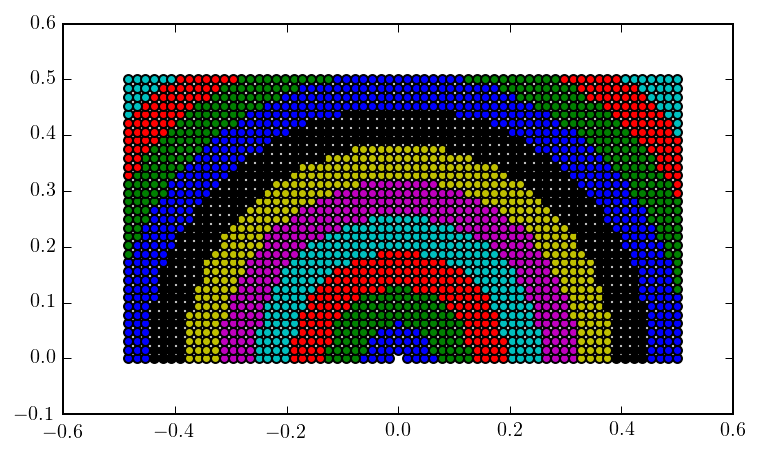

In [80]:
cc='bgrcmyk'
for ii,ki in enumerate(pairwise(kk)):   ### need to iterate over full k_vec in the bin as well.
    kdxi = np.logical_and(k>ki[0], k<=ki[1])
    for jj, aj in enumerate(pairwise(aa)):
        if nangle>1:
            adxj = np.logical_and(ang>aj[0], ang<=aj[1])
            idx = np.logical_and(kdxi, adxj)
        else:
            idx = kdxi
    kvec_bin = kvec[:,idx]
    powk = np.zeros(idx.sum(), dtype=np.float)
    print "***", ii, "***"
    for p, kv in zip(powk, kvec_bin.T):
        plt.scatter(kv.T[0], kv.T[1], c=cc[ii%len(cc)])
        plt.axis('scaled')

In [38]:
ndims=4
rshape = (8,)*ndims
kvec = realization.get_k(rshape)
kvec.shape[1:]

(8, 8, 8, 5)

In [65]:
nmaxs = 1,1
ndims= len(nmaxs)
rr = np.array([range(-nm,nm+1) for nm in nmaxs])
print 'rr:\n', rr
rout = np.array(np.meshgrid(*rr)).T.reshape(-1, ndims)
print 'rout:\n', rout
print 'shape:', rout.shape

# a = []
# for f in itertools.product(rrr, repeat=ndims):
#     a.append(f)
# np.array(a)

rr:
[[-1  0  1]
 [-1  0  1]]
rout:
[[-1 -1]
 [-1  0]
 [-1  1]
 [ 0 -1]
 [ 0  0]
 [ 0  1]
 [ 1 -1]
 [ 1  0]
 [ 1  1]]
shape: (9, 2)


In [59]:
import pixel_sample
import numpy as np
import matplotlib.pyplot as plt

def Pk(k, n1=1, n2=-3, k0=0.01):
    nu = k/(2*np.pi)
    with np.errstate(divide='ignore'):
        return np.where(nu<k0,(nu/k0)**n1, (nu/k0)**n2)
    
def beam(k, k_sigma = 0.02):
    nu = k/(2*np.pi)
    return np.where(nu/k_sigma<4, np.exp(-0.5*(nu/k_sigma)**2), np.exp(-0.5*(4)**2)*(nu/k_sigma/4)**-2)

def kcut(k, k_cut=0.025):
    nu = k/(2*np.pi)
    return np.where(nu<k_cut, 1, 0)
    
def Pk_beam(k):
    return Pk(k)*beam(k)   #*kcut(k)



In [60]:
reload(pixel_sample)
ndims=2
rshape = (1024,)*ndims
shrink_by=16
sk, subP = pixel_sample.subsamplePower(Pk, rshape, shrink_by=shrink_by, deltas=1, nk=50, nmax=16, eq_vol=False)
# kidx = sk<sk.max()/shrink_by
# sk = sk[kidx]
# subP = subP[kidx]

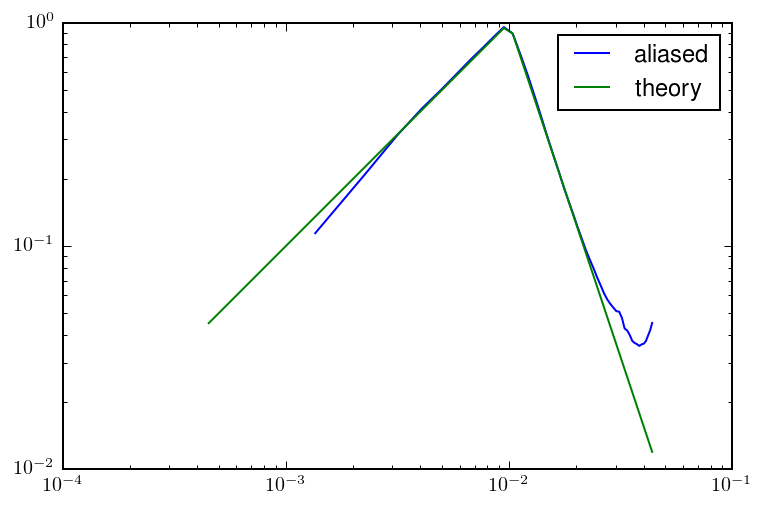

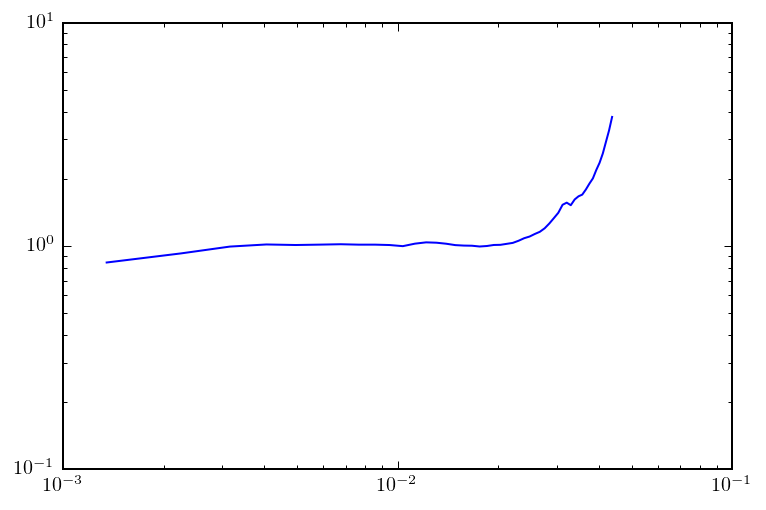

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

subP1 = subP #/4
fac = 1#2*np.pi
plt.figure()
plt.loglog(sk/fac, subP1, label="aliased")
plt.plot(sk/fac, Pk(2*np.pi*sk), label="theory")
plt.legend(loc='best')
plt.figure()
plt.loglog(sk[1:]/fac, subP1[1:]/Pk(2*np.pi*sk[1:]))

In [26]:
import realization
k = np.sqrt(realization.get_k2(rshape, deltas=1))

In [38]:
k.min(), k.flat[k.flat>0].min(), k.max()

(0.0, 0.0078125, 0.70710678118654757)

In [39]:
np.linspace(0,k.max(),50)

array([ 0.        ,  0.01443075,  0.0288615 ,  0.04329225,  0.057723  ,
        0.07215375,  0.0865845 ,  0.10101525,  0.11544601,  0.12987676,
        0.14430751,  0.15873826,  0.17316901,  0.18759976,  0.20203051,
        0.21646126,  0.23089201,  0.24532276,  0.25975351,  0.27418426,
        0.28861501,  0.30304576,  0.31747651,  0.33190726,  0.34633802,
        0.36076877,  0.37519952,  0.38963027,  0.40406102,  0.41849177,
        0.43292252,  0.44735327,  0.46178402,  0.47621477,  0.49064552,
        0.50507627,  0.51950702,  0.53393777,  0.54836852,  0.56279927,
        0.57723003,  0.59166078,  0.60609153,  0.62052228,  0.63495303,
        0.64938378,  0.66381453,  0.67824528,  0.69267603,  0.70710678])